### Introduction
In this project, I implemented Multivariate Linear Regression from scratch using only Python and NumPy — without relying on any machine learning libraries such as Scikit-Learn.

The main goal of this project is to understand the complete mathematical workflow behind linear regression when dealing with multiple input features, including:

- Exploring and visualizing a multivariate dataset.
- Preparing the data and applying feature normalization.
- Building the hypothesis function.
- Implementing the Cost Function (MSE).
- Implementing Vectorized Gradient Descent from scratch.
- Training the model and analyzing convergence.
- Making predictions using the learned parameters.

This project aims to provide a deeper understanding of how linear regression operates behind the scenes, especially when dealing with multiple variables that influence the output.

### Importing Libraries

In [52]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataset

In [53]:
# read data
path = os.path.join(os.getcwd(), 'data/data.csv')
df = pd.read_csv(path, header=None, names=['size','bedrooms','price'])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [54]:
# show data details
df.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Data Visualization

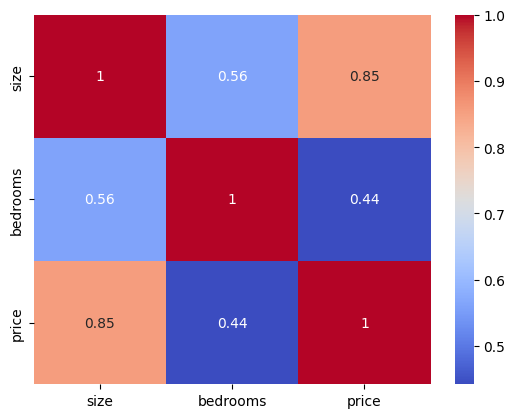

In [55]:
# Draw corr between data
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

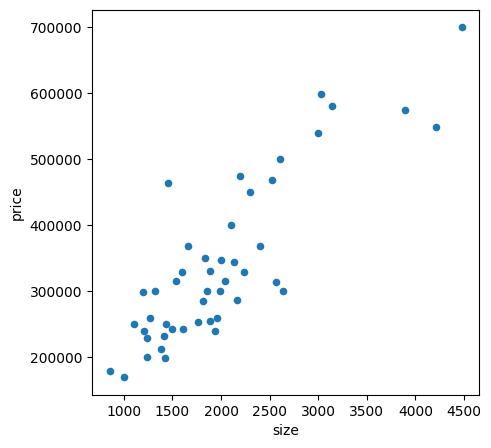

In [56]:
# Drow size vs. price data
df.plot(kind='scatter', x='size', y='price', figsize=(5,5))
plt.show()

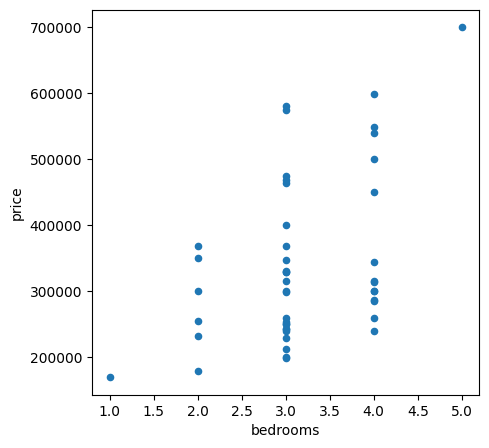

In [57]:
# draw bedrooms vs. price data
df.plot(kind='scatter', x='bedrooms', y='price', figsize=(5,5))
plt.show()

### Prepare Data

In [58]:
# separete X (training data) from y (target variable)
X = df.drop('price', axis=1)
y = df['price']

In [59]:
X_mean = X.mean()
X_std = X.std()

X = (X - X_mean)/ X_std

In [60]:
# Adding a new column called ones before the data
X.insert(0, 'ones', 1)
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [61]:
# convert from data frames to numpy matrices
X = np.array(X)
y = np.array(y)
theta = np.zeros(X.shape[1])

### Cost Function

In [62]:
# Cost Function
def computeCost(X, y, theta):
    m = X.shape[0]
    prediction =  X @ theta
    cost = 1 / (2*m) * np.sum((prediction - y)**2)
    return cost

### Gradient Descent

In [63]:
# GD Function
def gradientDescent(X, y, theta, alpha, iters):
    m = X.shape[0]
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X @ theta) - y
        gradient = (X.T @ error) / m
        theta = theta - alpha * gradient
        cost[i] = computeCost(X, y, theta)

    return theta, cost

### Training

In [64]:
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100

In [65]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
np.save('model_theta.npy', g)

### Evaluation

In [66]:
# mean squared error of train dataset
prediction = X @ g
mse = np.mean((prediction - y)**2)
print('mse_train = ', mse)

mse_train =  4087004680.6861405


In [67]:
# mean absolute error of train dataset
mae = np.mean(np.abs(prediction - y))
print('mae_train = ', mae)

mae_train =  51580.53178614384


In [68]:
# R2 error of train dataset
ss_res = np.sum((y - prediction)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)
print('r2_train = ', r2)

r2_train =  0.7329159649470545


### Plot Cost vs Iterations

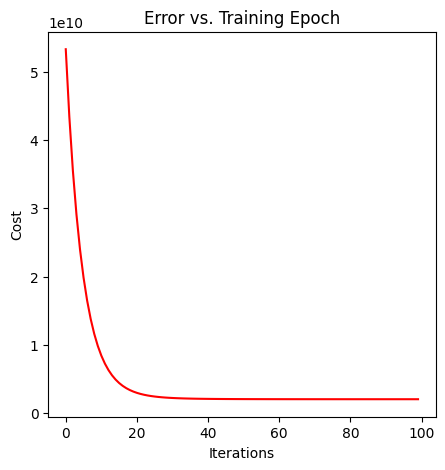

In [69]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### Conclusion
In this project, I successfully implemented Multivariate Linear Regression from scratch and trained the model using vectorized gradient descent.
By applying feature scaling and using multiple predictors (size and number of bedrooms), the model was able to converge smoothly and produce stable predictions.

Key takeaways:
- Feature normalization significantly improved the convergence speed.
- Vectorized gradient descent made the training process efficient and scalable.
- The model learned meaningful parameters and was able to predict housing prices based on multiple features.
- Visualizing the cost function showed a consistent decrease, confirming that gradient descent worked correctly.

This implementation helped reinforce the mathematical intuition behind linear regression and demonstrated how the algorithm behaves when extended to multivariate datasets.